#### 优先级队列

队列：先进先出；

优先级队列：优先级高的先出

实现一个优先级队列，方法有很多，但是用堆来实现是最直接、最高效的。这是因为，堆和优先级队列非常相似。一个堆就可以看作一个优先级队列。很多时候，它们只是概念上的区分而已。往优先级队列中插入一个元素，就相当于往堆中插入一个元素；从优先级队列中取出优先级最高的元素，就相当于取出堆顶元素。

##### 应用

Q: 赫夫曼编码、图的最短路径、最小生成树算法

Q: Java 的 PriorityQueue

Q: 假设我们有 100 个小文件，每个文件的大小是 100MB，每个文件中存储的都是有序的字符串。我们希望将这些 100 个小文件合并成一个有序的大文件。这里就会用到优先级队列。
* 合并排序。
  * 从这 100 个文件中，各取第一个字符串，放入数组中，然后比较大小
  * 把最小的那个字符串放入合并后的大文件中，并从数组中删除，再从这个小文件取下一个字符串，放到数组中
  * 重新比较大小，并且选择最小的放入合并后的大文件，将它从数组中删除。依次类推，直到所有的文件中的数据都放入到大文件为止。
  * 缺点：用数组这种数据结构来存储小文件中取出来的字符串，每次从数组中取出最小字符串，都需要遍历整个数组，不是很高效
* 堆排序
  * 将从小文件中取出来的字符串放入到小顶堆中（堆顶元素就是优先级队列队首的元素，就是最小字符串）。
  * 把最小的那个字符串放入合并后的大文件中，并从堆中删除，再从这个小文件取下一个字符串，放到堆中
  * 重新堆化，取堆顶元素
  * 删除堆顶元素和往堆中插入数据(不能直接把堆顶元素设成新的元素，可能导致完全二叉树失衡)，时间复杂度都为O(logn)


Q: 高性能定时器

假设我们有一个定时器，定时器中维护了很多定时任务，每个任务都设定了一个要触发执行的时间点。

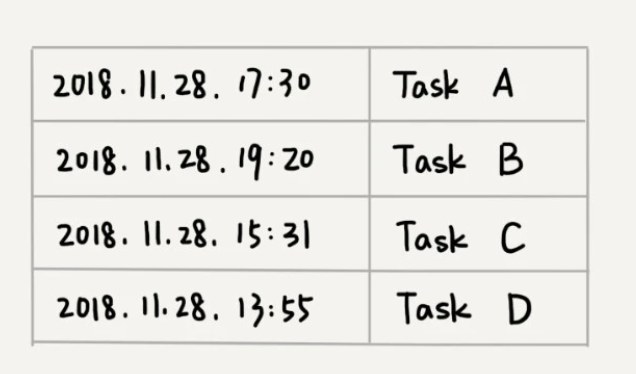

* 定期扫描一遍任务。
  * 定时器每过一个很小的单位时间（比如 1 秒），就扫描一遍任务，看是否有任务到达设定的执行时间。如果到达了，就拿出来执行。
  * 缺点：任务的约定执行时间离当前时间可能还有很久，这样前面很多次扫描其实都是徒劳的；每次都要扫描整个任务列表，如果任务列表很大的话，势必会比较耗时。
* 按照任务的执行时间，建小顶堆
  * 定时器只需拿对首的执行时间点，与当前的时间相减，得到一个时间间隔T，可以在T-1秒后再执行进行操作，之前，定时器不需要做任何事情


#### Top K

Q: Top K

Q1: 静态数据
* 维护大小为 k 的小顶堆
  * 前k个数据直接建堆
  * 遍历数组后续元素，比堆顶小的不做处理；比堆顶大的，删除堆顶元素，再插入（删之后需要先重新堆化后再插入）
  * 遍历数组需要 O(n) 的时间复杂度，一次堆化操作需要 O(logK) 的时间复杂度，所以最坏情况下，n 个元素都入堆一次，时间复杂度就是 O(nlogK)。

Q2: 动态数据（针对动态数据求得 Top K 就是实时 Top K）
* 维护大小为 k 的小顶堆
  * 如果每次询问前 K 大数据，我们都基于当前的数据重新计算的话，那时间复杂度就是 O(nlogK)，n 表示当前的数据的大小。
  * 可以一直都维护一个 K 大小的小顶堆，当有数据被添加到集合中时，就拿它与堆顶的元素对比。
  * 如果比堆顶元素大，我们就把堆顶元素删除，并且将这个元素插入到堆中；如果比堆顶元素小，则不做处理。
  * 这样，无论任何时候需要查询当前的前 K 大数据，我们都可以立刻返回给他。


#### 中位数

Q: 中位数

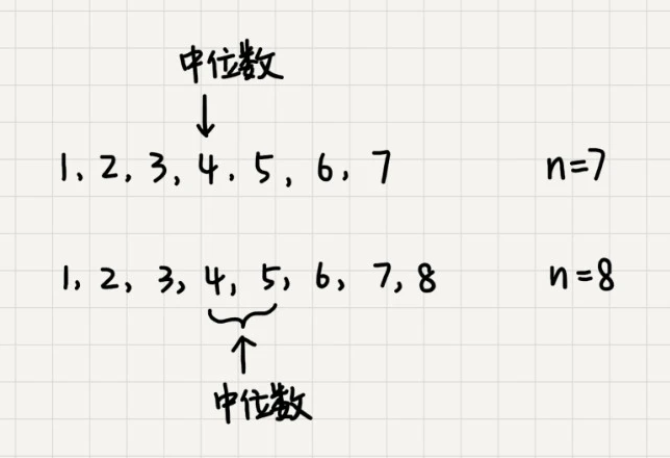

Q1: 静态数据
* 对于一组静态数据，中位数是固定的，我们可以先排序，第 n/2 个数据就是中位数。
* 每次询问中位数的时候，我们直接返回这个固定的值就好了。所以，尽管排序的代价比较大，但是边际成本会很小。

Q2: 动态数据
* 需要维护两个堆，一个大顶堆，一个小顶堆
  * 大顶堆中存储前半部分数据，小顶堆中存储后半部分数据，且小顶堆中的数据都大于大顶堆中的时间
  * 如果有 n 个数据，n 是偶数，从小到大排序，那前 n/2​ 个数据存储在大顶堆中，后 n/2​ 个数据存储在小顶堆中。这样，大顶堆中的堆顶元素就是我们要找的中位数。如果 n 是奇数，情况是类似的，大顶堆就存储 n/2​+1 个数据，小顶堆中就存储 n/2​ 个数据。
  * 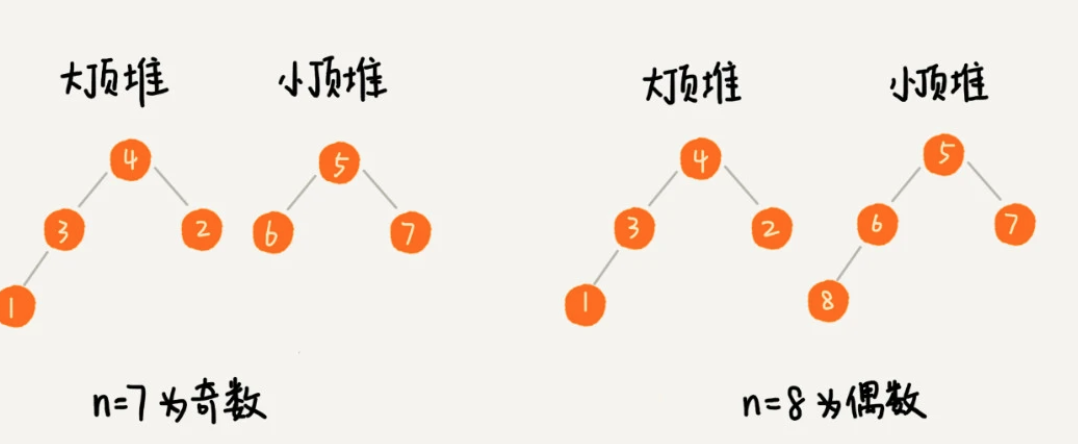
* 数据调整
  * 插入删除数据，时间复杂度：O(logn)
  * 新加入的数据 小于等于 大顶堆的堆顶数据，就将数据插入大顶堆；否则插入小顶堆
  * 解决两边数据个数不等的问题：
    * 数据量 n 为 偶数 时，两个堆中的数据个数为 n/2;数据量 n 为 奇数 时，大顶堆中是数据个数为 n/2+1，小顶堆的数据量个数为 n/2
    * 大顶堆：最多容纳 total_count/2 (+1) 个数据，如果加入新的节点 big_heap_count > total_count/2(+1)，去除堆顶元素放入小顶堆中。
    * 小顶堆：最多容纳 total_count/2 个数据，如果加入新的节点 small_heap_count > total_count/2，去除堆顶元素放入大顶堆中
    * 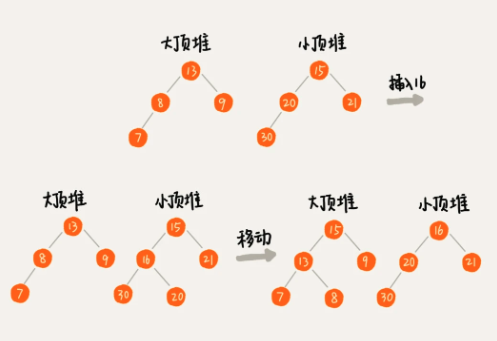


##### P99 响应时间
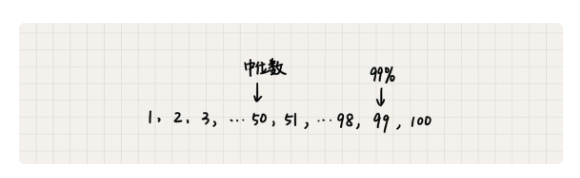
* 需要维护两个堆，一个大顶堆，一个小顶堆
  * 假设当前总数据的个数是 n，大顶堆中保存 n*99% 个数据，小顶堆中保存 n*1% 个数据
  * 大顶堆堆顶的数据就是我们要找的 99% 响应时间。



#### 业务场景应用

Q: 假设现在有一个包含 10 亿个搜索关键词的日志文件，如何快速获取到 Top 10 最热门的搜索关键词呢？

* 工具类：
  * MapReduce
  * 利用 redis 的 zset 可以直接获取 top10

* 算法类（假设单机，1GB内存）：
  * 统计每个关键词出现的次数。散列表、平衡二叉树、或其他一些支持快速查询、插入的数据结构
  * 假设使用散列表，扫描10亿个关键词，存在则+1，不存在则设1
  * 建一个大小为10的小顶堆，扫描散列表，重复建堆
  * XXX 
  * 假设10亿条搜索关键词不重复的有1亿条，每个搜索词的平均长度为50字节，存储1一条关键词则需要5G，而散列因为要避免频繁的冲突，不会选择太大的装载因子，消耗的内存会更多 -> 优化数据存储方式
  * XXX
  * 将10亿条搜索关键词先通过哈希算法分片到10个文件里
    * 创建空10个文件，遍历10亿个关键词，并通过某个哈希算法对其求哈希值（相同数据经过哈希算法得到的哈希值是一样的 ），哈希值同10取模 -> 搜索关键词对应的文件编号
    * 对10亿个关键词分片，每个文件只有1亿个关键词，去除掉重复的，可能就只有 1000 万个，每个关键词平均 50 个字节，所以总的大小就是 500MB。1GB 的内存完全可以放得下。
    * 针对每个包含 1 亿条搜索关键词的文件，利用散列表和堆，分别求出 Top 10，然后把这个 10 个 Top 10 放在一块，然后取这 100 个关键词中，出现次数最多的 10 个关键词，这就是这 10 亿数据中的 Top 10 最频繁的搜索关键词了。



Q：有一个访问量非常大的新闻网站，我们希望将点击量排名 Top 10 的新闻摘要，滚动显示在网站首页 banner 上，并且每隔 1 小时更新一次。如果你是负责开发这个功能的工程师，你会如何来实现呢？
1. 对每篇新闻摘要计算一个hashcode，并建立摘要与hashcode的关联关系，使用map存储，以hashCode为key，新闻摘要为值
2. 按每小时一个文件的方式记录下被点击的摘要的hashCode
3. 当一个小时结果后，上一个小时的文件被关闭，开始计算上一个小时的点击top10
4. 将hashcode分片到多个文件中，通过对hashCode取模运算，即可将相同的hashCode分片到相同的文件中
5. 针对每个文件取top10的hashCode，使用Map<hashCode,int>的方式，统计出所有的摘要点击次数，然后再使用小顶堆（大小为10）计算top10,
6. 再针对所有分片计算一个总的top10,最后合并的逻辑也是使用小顶堆，计算top10
7. 如果仅展示前一个小时的top10,计算结束
8. 如果需要展示全天，需要与上一次的计算按hashCode进行合并，然后在这合并的数据中取top10
9. 在展示时，将计算得到的top10的hashcode，转化为新闻摘要显示即可

这个方案理论上比较合理，实际生产环境可能不理想，一个新闻网站的链接数目也是海量的，如果用hash存储，本地内存就是一个考验，还有hash算法，hash装载因子的选择都比较有难度。我觉得利用成熟的中间件做缓存比较合适

利用 redis 的 zset 可以直接获取 top10

